In [1]:
import cv2
import numpy as np
import os
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA
from pyefd import elliptic_fourier_descriptors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

In [2]:
%matplotlib inline

In [8]:
def read_images_and_extract_contours_single_image(img_location):
    """Read images from a folder and extract their largest external contour."""
    images = img_location
    contours_list = []
    for image_path in images:
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        if contours:
            contour = max(contours, key=cv2.contourArea)
            contour = contour.squeeze()
            contours_list.append(normalize_contour_points(contour))
    return contours_list

In [4]:
def normalize_contour_points(contour):
    """Normalize contour points to a fixed number for consistency."""
    N = 250
    contour_length = np.linspace(0, 1, len(contour))
    normalized_length = np.linspace(0, 1, N)
    interp_func_x = interp1d(contour_length, contour[:, 0], kind='linear')
    interp_func_y = interp1d(contour_length, contour[:, 1], kind='linear')
    normalized_contour = np.vstack((interp_func_x(normalized_length), interp_func_y(normalized_length))).T
    return normalized_contour

def compute_fourier_coefficients(contour, order=30):
    """Compute Fourier coefficients for a given contour."""
    coeffs = elliptic_fourier_descriptors(contour, order=order, normalize=True)
    # return coeffs[1:]  # Skip the first coefficient as it's related to the image position
    return coeffs

In [38]:
image_to_predict_path = '/home/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/bottleneck/sd_malformed_12_2_1_100_10.png'

contours = read_images_and_extract_contours_single_image([image_to_predict_path])[0]

In [5]:
def compute_first_10_harmonics(contour, order=30):
    """Compute Fourier coefficients and return the first 10 harmonics."""
    coeffs = elliptic_fourier_descriptors(contour, order=order, normalize=True)
    first_10_harmonics = coeffs[:10]  # Extract the first 5 harmonics
    return first_10_harmonics


In [29]:
twenty_harmonics = compute_first_10_harmonics(contours)

In [30]:
twenty_harmonics

array([[ 1.00000000e+00, -1.02956188e-16,  1.62129915e-17,
        -5.52570366e-01],
       [-3.04092695e-02, -1.25999907e-02,  9.03849476e-03,
        -1.10595575e-01],
       [ 7.66517071e-02, -2.60998114e-03,  9.42163156e-03,
        -7.45592650e-02],
       [-2.14113272e-02, -4.53565409e-03, -3.61919070e-03,
         5.28690922e-02],
       [ 4.28531425e-03, -3.93233364e-03, -5.43061607e-03,
        -2.29199843e-02],
       [-3.70395780e-03, -2.92326755e-03,  5.96738218e-04,
         1.37181307e-03],
       [ 2.13312419e-03,  3.81513513e-04, -4.18341631e-04,
         2.87394028e-05],
       [-2.83015391e-03, -2.18417497e-03, -8.93119451e-04,
         3.41578745e-04],
       [-1.14931600e-03, -6.67447090e-04,  2.04174595e-03,
         1.25733688e-03],
       [ 1.04653645e-03, -7.79432381e-04, -3.20947634e-04,
         2.12935346e-04],
       [ 4.51080284e-04, -1.42114706e-04, -2.48177316e-03,
         3.25785923e-03],
       [ 1.70979230e-03, -7.56384089e-04, -1.67773335e-04,
      

In [6]:
def plot_harmonic_distribution(harmonics):
    """Plot the distribution of the first 10 harmonic or coefficients as magnitudes."""
    # Compute magnitudes for each harmonic (A_n, B_n, C_n, D_n)
    magnitudes = np.linalg.norm(harmonics, axis=1)  # Calculate sqrt(A_n^2 + B_n^2 + C_n^2 + D_n^2)
    
    # Create a plot
    plt.figure(figsize=(8, 5))
    harmonic_indices = np.arange(1, len(magnitudes) + 1)
    plt.bar(harmonic_indices, magnitudes, color='skyblue', alpha=0.7)

    # Add labels and title
    plt.xlabel('Harmonic Number')
    plt.ylabel('Magnitude')
    plt.title('Distribution of the First 10 Harmonics')
    plt.xticks(harmonic_indices)

    # Show the plot
    plt.show()

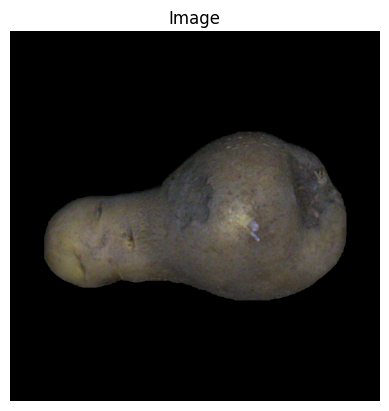

In [39]:
# import cv2
# import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_to_predict_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the BGR image to RGB for Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(rgb_image)
    plt.title("Image")
    plt.axis('off')  # Hide axis labels
    plt.show()

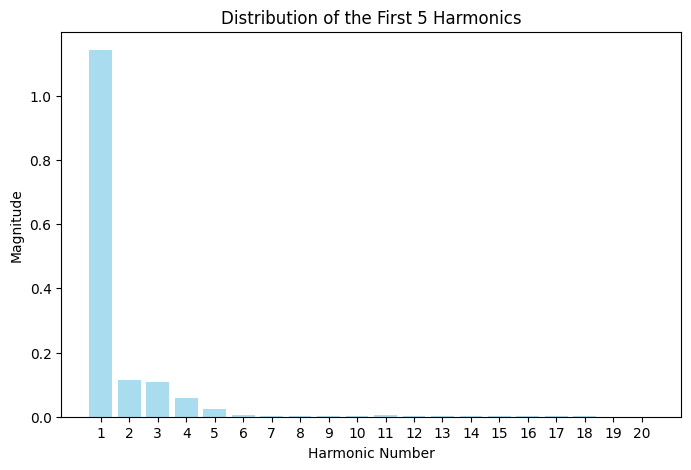

In [32]:
plot_harmonic_distribution(twenty_harmonics)

In [40]:
image_to_predict_path = '/home/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/bottleneck/sd_malformed_12_2_1_100_0.png'

contours = read_images_and_extract_contours_single_image([image_to_predict_path])[0]

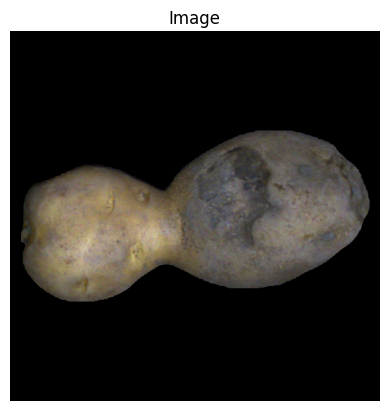

In [41]:
image = cv2.imread(image_to_predict_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the BGR image to RGB for Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(rgb_image)
    plt.title("Image")
    plt.axis('off')  # Hide axis labels
    plt.show()

In [34]:
bottleneck_20_harmonics = compute_first_20_harmonics(contours)

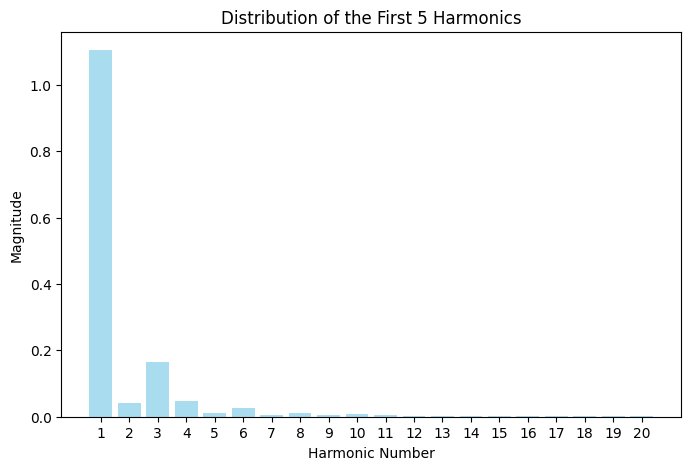

In [35]:
plot_harmonic_distribution(bottleneck_20_harmonics)

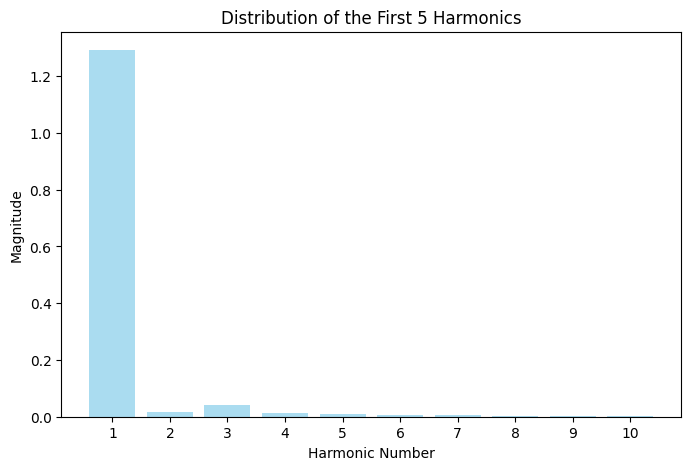

In [12]:
# Good Potato
# image_to_predict_path = '/home/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/good/Afra_12_2_1_100_6.png'

# For MAC
image_to_predict_path = '/Users/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/good/Afra_12_2_1_100_6.png'

contours = read_images_and_extract_contours_single_image([image_to_predict_path])[0]

good_potato_10_harmonics = compute_first_10_harmonics(contours)

plot_harmonic_distribution(good_potato_10_harmonics)



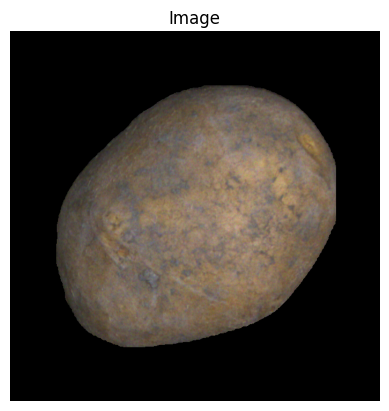

In [13]:
image = cv2.imread(image_to_predict_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the BGR image to RGB for Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(rgb_image)
    plt.title("Image")
    plt.axis('off')  # Hide axis labels
    plt.show()

In [14]:
# Old one
# def calculate_separator(efd_coeffs):
#     # Extract the first 10 harmonics
#     first_10_harmonics = efd_coeffs[:10]

#     # Calculate the separator value
#     separator_value = np.sum(first_10_harmonics * np.abs(first_10_harmonics)**3)

#     return separator_value

In [ ]:
def calculate_separator(efd_coeffs, m=3):
    # Extract the first 10 harmonics
    first_10_harmonics = efd_coeffs[:10]

    # Calculate the separator value
    separator_value = np.sum(first_10_harmonics * np.power(np.arange(10), m))

    return separator_value

In [15]:
calculate_separator(good_potato_10_harmonics)

0.5524049912710352

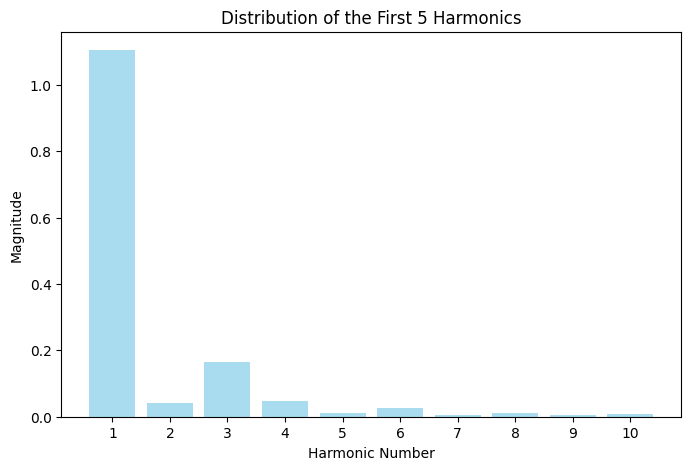

In [16]:
# For Bottleneck Potato

image_to_predict_path = '/Users/mishkat/Documents/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class/bottleneck/sd_malformed_12_2_1_100_0.png'

contours = read_images_and_extract_contours_single_image([image_to_predict_path])[0]

good_potato_10_harmonics = compute_first_10_harmonics(contours)

plot_harmonic_distribution(good_potato_10_harmonics)

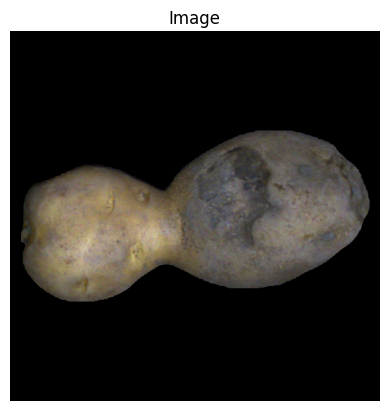

In [17]:
image = cv2.imread(image_to_predict_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the BGR image to RGB for Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(rgb_image)
    plt.title("Image")
    plt.axis('off')  # Hide axis labels
    plt.show()

In [18]:
calculate_separator(good_potato_10_harmonics)

0.9509757299299091

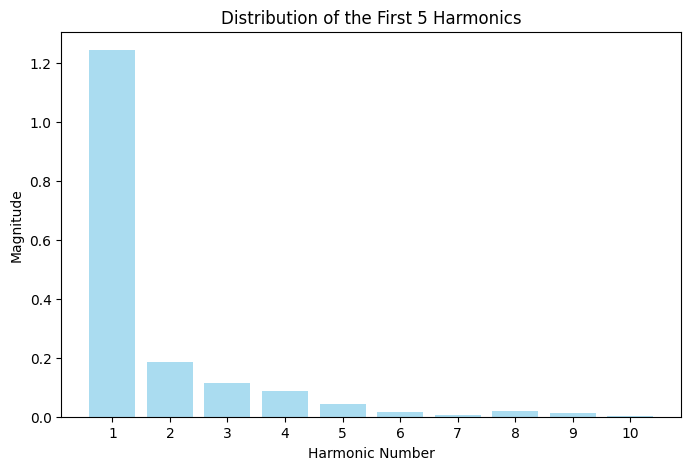

In [19]:
# For Bottleneck Potato

image_to_predict_path = '/Users/mishkat/Documents/malformed_potato/sd_malformed_12_2_3_248_Potato_7.png'
contours = read_images_and_extract_contours_single_image([image_to_predict_path])[0]

good_potato_10_harmonics = compute_first_10_harmonics(contours)

plot_harmonic_distribution(good_potato_10_harmonics)

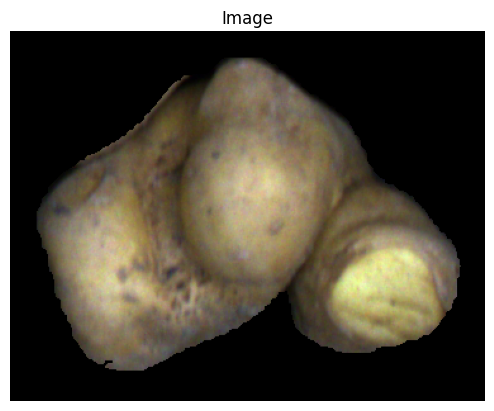

In [20]:
image = cv2.imread(image_to_predict_path)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Convert the BGR image to RGB for Matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(rgb_image)
    plt.title("Image")
    plt.axis('off')  # Hide axis labels
    plt.show()

In [21]:
calculate_separator(good_potato_10_harmonics)

0.6980794707211031

In [24]:
fourier_coeffs = compute_fourier_coefficients(contours)


In [25]:
fourier_coeffs[:5]

array([[ 1.00000000e+00, -1.02956188e-16,  1.62129915e-17,
        -5.52570366e-01],
       [-3.04092695e-02, -1.25999907e-02,  9.03849476e-03,
        -1.10595575e-01],
       [ 7.66517071e-02, -2.60998114e-03,  9.42163156e-03,
        -7.45592650e-02],
       [-2.14113272e-02, -4.53565409e-03, -3.61919070e-03,
         5.28690922e-02],
       [ 4.28531425e-03, -3.93233364e-03, -5.43061607e-03,
        -2.29199843e-02]])

In [10]:
harmonics = compute_first_5_harmonics(contour)

/home/mishkat/miniconda3/envs/karevo_test/lib/python3.11/site-packages/pyefd.py:58: RuntimeWarning: invalid value encountered in divide
  phi = (2 * np.pi * t) / T


ValueError: operands could not be broadcast together with shapes (0,2) (30,0) 